# Исследование данных о продаже видеоигр
 
**Поставленная задача** 

Выявить закономерности, определяющие успешность игры на основе исторических данных о продажах. Спрогнозировать каким может быть потенциально популярный продукт.  
  
**Цель исследования** - дать ответы на вопросы:

- Как меняется ситуация на рынке видеоигр от года к году?
- Как жанры игр влияют на продажи?
- Как влияет рейтинг ESRB на продажи в каждом отдельном регионе?
- Есть ли влияние отзывов и оценок на продажи игр?
- Какой портрет пользователя в каждом отдельном регионе? 

**Ход исследования**

Исследование содержит следующие этапы:
- Обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Проверка гипотез
- Общий вывод


Описание данных:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB 

## Обзор данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Параметры отображения
sns.set(style="darkgrid")
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Загрузка датасета
try:
    data = pd.read_csv('/home/evgeniya/Документы/Python/3/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [4]:
# Общая информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Просмотр таблицы данных
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
# Границы периода датасета
display(
    data['Year_of_Release'].min(),
    data['Year_of_Release'].max()
)

1980.0

2016.0

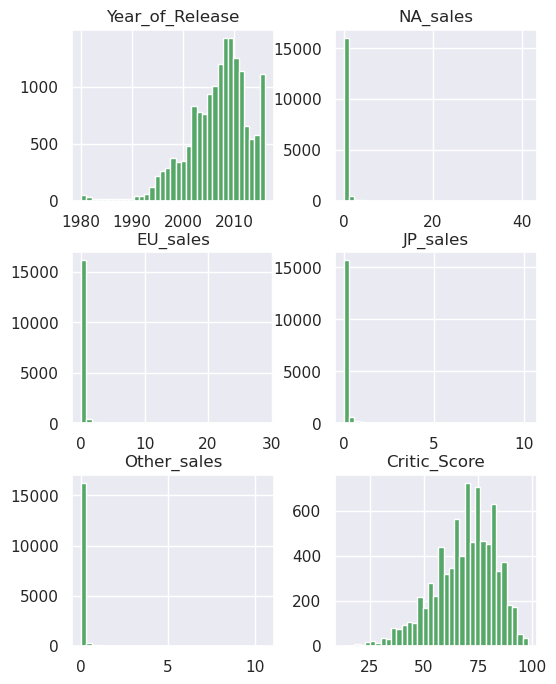

In [7]:
# Общая гистограмма датасета
data.hist(bins=35,  color='g', figsize=(6, 8));

### Вывод
Датасет сформирован за период с 1980 по 2016 гг. Но не все данные для нас интересны.

По гистограммам заметно, что наибольшее количество релизов игр было осуществлено ~2007-2011 год, а затем был спад в релизах и с ~2015 рынок начал стремительно наполняться новыми продуктами. Видимо, по каким-то причинам была просадка.

Доля проданных копий игр по всем регионам примерно равна.

По гистограмме оценок критиками можно предположить, что в целом рынок игр наполнен качественными продуктами, так как график сконцентрирован на значениях 60 и выше.

## Предобработка данных

In [8]:
# Объем данных до предобработки
data_start = len(data)
data_start

16715

Проверим датасет на предмет абсолютных дубликатов

In [9]:
data.duplicated().sum()

0

Явных дубликатов в датасете нет.

In [10]:
# Проверяем названия столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Переименуем столбцы в соответсвии с 'best practices':

In [11]:
data.columns = data.columns.str.lower() # приводим к нижнему регистру
data = data.rename(columns={'year_of_release' : 'year'}) # для личного удобства укорачиваем
data.columns

Index(['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверка столбцов на уникальные значения и типов данных для дальнейшей обработки, кроме столбцов с названием и данными о продажах.

In [12]:
# Функиця для отображения уникальных значений оперделенных столбцов
def unique_value(name):
    print(name+'\n', data[name].unique(),'\n')
for i in data.columns[[1,2,3,8,9,10]]:
    unique_value(i)
    
# Отображение типов данных    
data.dtypes

platform
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 

year
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.] 

genre
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan] 

critic_score
 [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.] 

user_score
 ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '

name             object
platform         object
year            float64
genre            object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
critic_score    float64
user_score       object
rating           object
dtype: object

- В столбце `platform` для удобства исследования приведем аббревиатуры к полному названию платформ.
- Столбец `year` не требует дополнительной обратки - только не предмет пропущенных значений.
- Столбец `genre` приведем к нижнему регистру.
- `critic_score` - требует обработки пропущенных значений.
- `user_score` - обработка пропущенных значений и tbd, что означает To be determined или "Будет сообщено дополнительно". Это не дает никакой конкретной информации, потому меняем значения на nan. 
- `rating` - По информации из [Википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) приходим к выводу, что "К-А" необходимо переименовать в "Е" - это одно и то же. Список классификаций рейтинга:

    * «EC» - «Для детей младшего возраста» от 3х
    * «E» -  «Для всех»
    * «E10+» - «Для всех от 10 лет и старше»
    * «T» - «Подросткам» от 13ти
    * «M» - «Для взрослых» от 17ти
    * «AO» - «Только для взрослых» от 18ти
    * «RP» - «Рейтинг ожидается». Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Пропущенные значения могут означать, что игра получала возрастной рейтинг в другой организации и потому нет данных. Есть несколько основных возрастных рейтингов: американская ESRB, европейская PEGI, немецкая USK, японская CERO, российская RARS, а также еще несколько региональных организаций. [Источник](https://dtf.ru/gamedev/265535-vozrastnoy-reyting-i-kak-ego-poluchit). Оставляем пропущенные значения.

Необходимо изменить текущие типы данных на следующие:

- `name` - str
- `platform` - str
- `release` - int
- `genre` - str
- `na_sales` - оставляем
- `eu_sales` - оставляем
- `jp_sales` - оставляем
- `other_sales` - оставляем
- `critic_score` - оставляем
- `user_score` - float
- `rating` - str


In [13]:
# Меняем названия платформ на полную версию
data = data.replace({'platform':
                     {'2600' : 'Atari 2600',
                      'Wii' : 'Nintendo Wii',
                      'NES' : 'Nintendo NES',
                      'GB' : 'GB-60',
                      'DS': 'Nintendo DS',
                      'X360': 'Xbox 360',
                      'SNES': 'Nintendo SNES',
                      'GBA' : 'Game Boy Advance',
                      '3DS' : 'Nintendo 3DS',
                      'N64' : 'Nintendo 64',
                      'XB' : 'Xbox',
                      'XOne' : 'Xbox One',
                      'WiiU' : 'Nintendo Wii U',
                      'GC' : 'Nintendo GameCube',
                      'GEN' : 'SEGA Retro Genesis',
                      'DC' : 'Dendy Classic',
                      'PSV' : 'PS Vita',
                      'SAT' : 'Sega Saturn',
                      'WS' : 'WonderSwan',
                      'TG16' : 'NEC TurboGrafx',
                      '3DO' : 'Panasonic 3DO',
                      'GG' : 'Game Gear',
                      'PCFX' : 'NEC PC-FX',
                      'NG' : 'Neo Geo'}})

In [14]:
# Приводим названия к нижнему регистру
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

In [15]:
# Меняем значения на nan
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [16]:
# Меняем значения
data['rating'] = data['rating'].replace('K-A', 'E')

In [17]:
# Приводим типы данных к нужному формату
data[['name', 'platform', 'genre', 'rating']] = data[['name', 'platform', 'genre', 'rating']].astype('string')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype(float)
data['year'] = pd.to_numeric(data['year'], errors='coerce').astype('Int64')
data.dtypes

name             string
platform         string
year              Int64
genre            string
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
critic_score    float64
user_score      float64
rating           string
dtype: object

In [18]:
# Проверка вида таблицы
data.head(10)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,nintendo wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,nintendo nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,<NA>
2,Mario Kart Wii,nintendo wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,nintendo wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,gb-60,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,<NA>
5,Tetris,gb-60,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,<NA>
6,New Super Mario Bros.,nintendo ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E
7,Wii Play,nintendo wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E
8,New Super Mario Bros. Wii,nintendo wii,2009,platform,14.44,6.94,4.70,2.24,87.00,8.40,E
9,Duck Hunt,nintendo nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,<NA>


Первоначальная обработка проведена.

Проверяем сколько пропущенных значений в датасете

In [19]:
print(data.isna().sum().sort_values(ascending=False))
print()
data.isna().mean().sort_values(ascending=False) * 100

user_score      9125
critic_score    8578
rating          6766
year             269
name               2
genre              2
platform           0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
dtype: int64



user_score     54.59
critic_score   51.32
rating         40.48
year            1.61
name            0.01
genre           0.01
platform        0.00
na_sales        0.00
eu_sales        0.00
jp_sales        0.00
other_sales     0.00
dtype: float64

Столбцы `user_score` и `critic_score` имеют большое значение пропусков и их удаление повлияет на результат исследования. Пропуски могут означать, что игры были неоцененными или подсчет рейтинга еще в процессе, или по другим неочевидным причинам. Не меняем значений, чтобы не исказить результат исследования.

Столбец `rating` имеет большое количество пропусков, но мы не можем его удалить, так как он составляет значимую часть данных и может повлияет на результат исследований. Переименуем пропущенные значения в "неизвестно".

In [20]:
data['rating'] = data['rating'].replace({np.nan : 'неизвестно'})

Столбец `year` имеет пропуски. Но также в данных есть игры, в названии которых есть указание года, но в данных по какой-то причине этот год не указывается. Так как мы не знаем по какой причине не указан год, удалим пропуски, чтобы не допускать возможных неточностей.

In [21]:
data[data['year'].isna()].head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94.00,8.50,E
377,FIFA Soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84.00,6.40,E
456,LEGO Batman: The Videogame,nintendo wii,<NA>,action,1.80,0.97,0.00,0.29,74.00,7.90,E10+
475,wwe Smackdown vs. Raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,NaN,NaN,неизвестно
609,Space Invaders,atari 2600,<NA>,shooter,2.36,0.14,0.00,0.03,NaN,NaN,неизвестно


В столбце `name`, `genre` мы не можем заменить пропущенные значения средним или медианным значением. И оставить никак не можем, потому что не понимаем к какой игре относятся данные. Значений не так много и они не повлияют на исследования. Пропуск мог возникнуть из-за человеческой ошибки при заполнении. Удаляем эти данные. 

In [22]:
data.dropna(subset=['year', 'name', 'genre'], inplace=True)

In [23]:
# Пропущенные данные обработаны
data.isna().sum()

name               0
platform           0
year               0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8461
user_score      8981
rating             0
dtype: int64

Проверяем датасет на предмет аномальных значений в столбцах о продажах игр.

In [24]:
# Функция указывающая самое меньшее и наибольшее значение
def anomal_value(name):
    print(name+'\n', data[name].min(),'\n',data[name].max(),'\n' )
for i in data.columns[4:8]:
    anomal_value(i)

na_sales
 0.0 
 41.36 

eu_sales
 0.0 
 28.96 

jp_sales
 0.0 
 10.22 

other_sales
 0.0 
 10.57 



Есть нулевые значения. Есть вероятность, что игры совсем не были проданы, либо в определенных регионах они могли не получить разрешения для релиза. Оставляем как есть.

Добавляем в таблицу столбец `total_sales` с данными о суммарных продажах по всем регионам.

In [25]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,nintendo wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,nintendo nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,неизвестно,40.24
2,Mario Kart Wii,nintendo wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,nintendo wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,gb-60,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,неизвестно,31.38


In [26]:
# Подсчитываем насколько данные уменьшились после предобработки
print(data_start - len(data)) 
(data_start - len(data)) / len(data) * 100 


271


1.6480175139868645

### **Вывод**

После предобработки таблица уменьшилась на 271 значение, что равняется 1.64% от общего объема данных. 

Были обработаны названия, по которым мы будем производить анализ, обработаны значения столбцов и пропуски. Добавлен столбец с общим количеством продаж по регионам.

Таблица готова к исследованию.

## Исследовательский анализ данных

### Как меняется ситуация на рынке видеоигр от года к году?

Для ответа на вопрос посмотрим сколько игр выпускалось в разные годы. Посмотрим как менялись продажи по платформам - по данным самой популярной платформы посмотрим распределение продаж по годам.

Найдем период данных, который поможет спрогнозировать ситуацию  на будущий год. Найдем по актуальным данным платформы для анализа, которые лидируют по продажам, какие растут и падают. Найдем потенциально прибыльные платформы.

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
total_sales,350,482,829,775,762,939,1006,1197,1427,1426,1255,1136,653,544,581,606,502


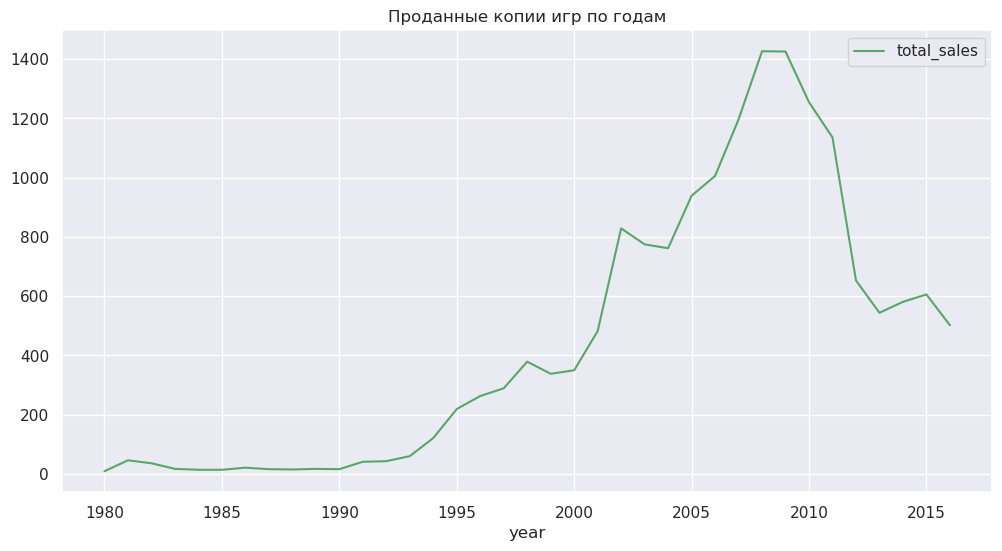

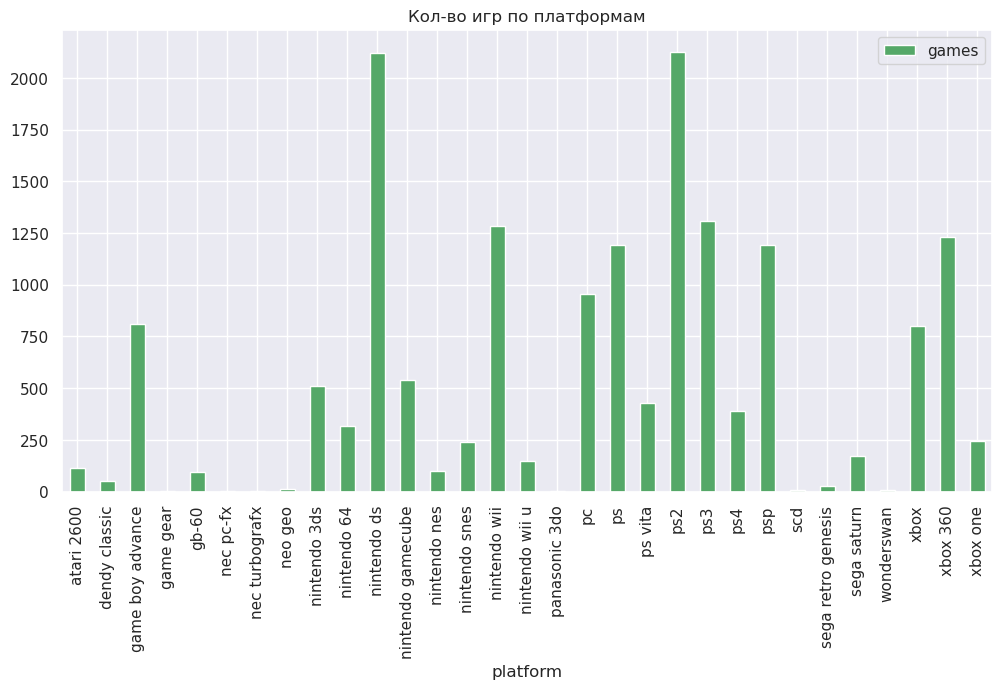

In [27]:
# Строим график по кол-ву проданных копий по годам
(data
 .pivot_table(index='year', values='total_sales', aggfunc='count')
 .plot(color='g',title='Проданные копии игр по годам',  figsize=(12, 6)));

# На графике видно, что наибольшее значение релизов в периоде с 2000 до 2016 гг.
# Строим таблицу со значениями за период
display(data.query('year >= 2000').pivot_table(index='year', values='total_sales', aggfunc='count').T)

# Строим график выпущенных игр за период по платформам
game = data.pivot_table(index='platform', values='name', aggfunc='count').reset_index()
game.columns = ['platform', 'games']
game.plot.bar(x='platform', y='games', title='Кол-во игр по платформам', color='g', figsize=(12, 6));  
plt.show()

По графику виден пик на 2008 году - продано наибольшее количество копий. С 2012 идет резкий спад в 2 раза по сравнению с 2011 годом. 

А наибольшее количество продаж за весь период данных у `ps2` и `nintendo ds`.

Данные не актуальны для прогноза, так как многие платформы были выпущены позже и не успели выбиться в лидеры, в частности это касается ps и xbox более новых поколений.

Для понимания сколько еще будут актуальны платформы-фавориты по продажам, чтобы выбрать период для исследования, проанализируем сколько существуют платформы на рынке в среднем.

,count,mean,std,min,25%,50%,75%,max
years,31.00,7.68,5.08,1.00,4.00,7.00,11.00,26.00


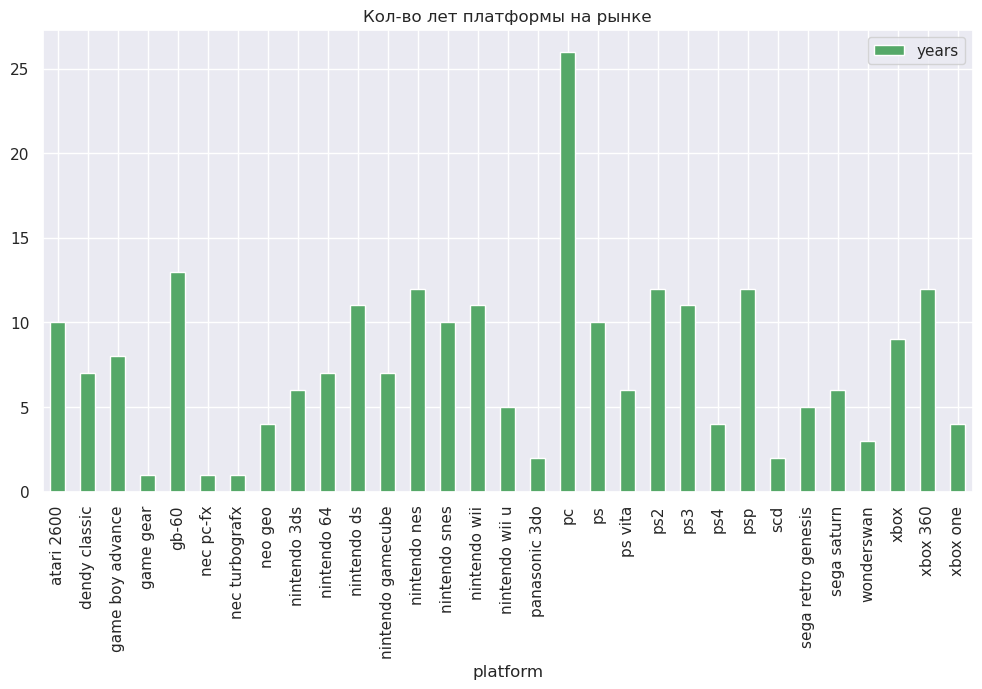

,platform,years
0,atari 2600,10
1,dendy classic,7
2,game boy advance,8
3,game gear,1
4,gb-60,13
5,nec pc-fx,1
6,nec turbografx,1
7,neo geo,4
8,nintendo 3ds,6
9,nintendo 64,7


In [28]:
# Выводим информация о кол-ве лет платформ на рынке
platform = data.pivot_table(index='platform', values='year', aggfunc='nunique').reset_index()
platform.columns = ['platform', 'years']
platform.plot.bar(x='platform', y='years', title='Кол-во лет платформы на рынке', color='g', figsize=(12, 6));  
display(platform.describe().T)
plt.show()
display(platform)

По графикам и данным видно, что среднее кол-во лет существования платформы ~7 лет. 
Дольше всего сущетсвует на рынке платформа  `pc` - и скорее всего и будет продолжать существовать еще много лет. Это фаворит по долголетию. 

Учтем это наблюдение в дальнейшем исследовании.

Далее для исследования берем период данных с 2015 и по 2016. Это обусловленно тем, технологии и предпочтения у пользователей меняются очень быстро, на предпочтения могут влиять инфлюенсеры, политиеская повестка, мода и т.д.. Будем учитывать самый свежий период в 2 года, чтобы более точно определить последние тенденции и точнее спрогнозировать будущий продукт.

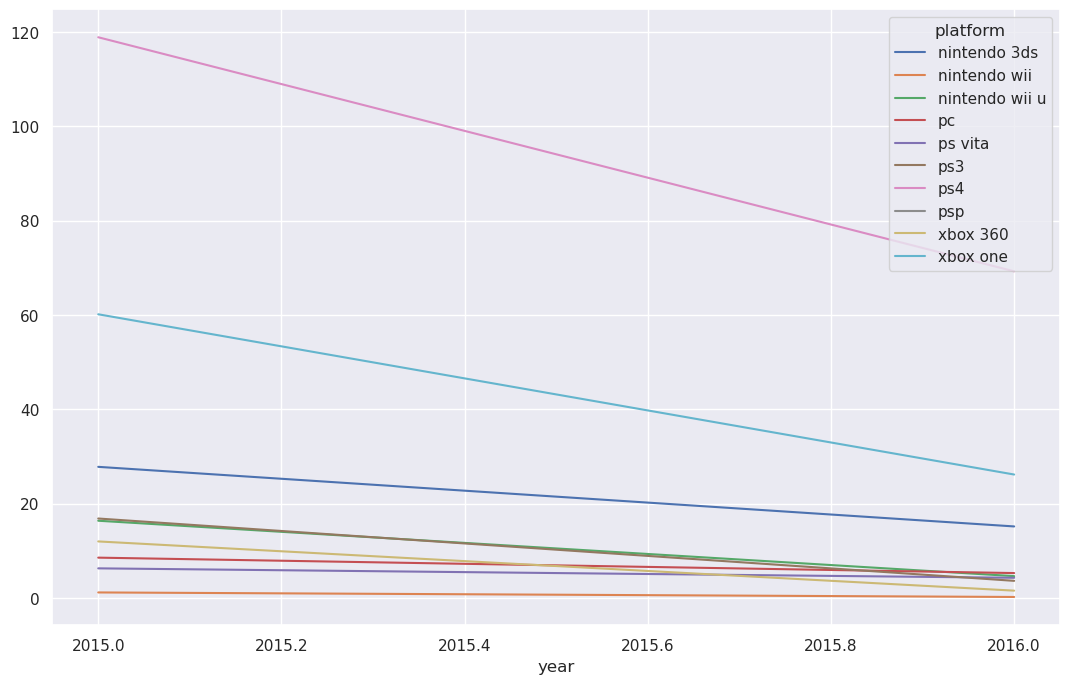

year,2015,2016,All
platform,,,
All,267.98,129.94,397.92
ps4,118.90,69.25,188.15
xbox one,60.14,26.15,86.29
nintendo 3ds,27.78,15.14,42.92
nintendo wii u,16.35,4.60,20.95
ps3,16.82,3.60,20.42
pc,8.52,5.25,13.77
xbox 360,11.96,1.52,13.48
ps vita,6.25,4.25,10.50


In [29]:
# Создаем новую таблицу, фильтруя по значению года
data_new = data.query('year >= 2015')

# Визуализируем данные
data_new.pivot_table(index='year', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize = (13, 8));
plt.show()

# Выводим таблицу для детального анализа
(data_new
 .pivot_table(index='year', columns = 'platform', values='total_sales', aggfunc='sum', margins=True)
 .T
 .sort_values(by='All', ascending=False)
)

По графику видно, что явный лидер по продажам за период `ps4` и `xbox one`. Потенциал более ранних версий платформ угасает, тогда когда обновленные версии выходят в топ.  

`nintendo 3ds` также перехватывает инициативу у своего старшего брата `nintendo wii u`.

Выделим топ-5 популярных платформ:
- `ps4`
- `xbox one`
- `nintendo 3ds`
- `nintendo wii u`
- `ps3`

Для дальнейшего анализа продаж по платформам посмотрим график размаха "ящик с усами".

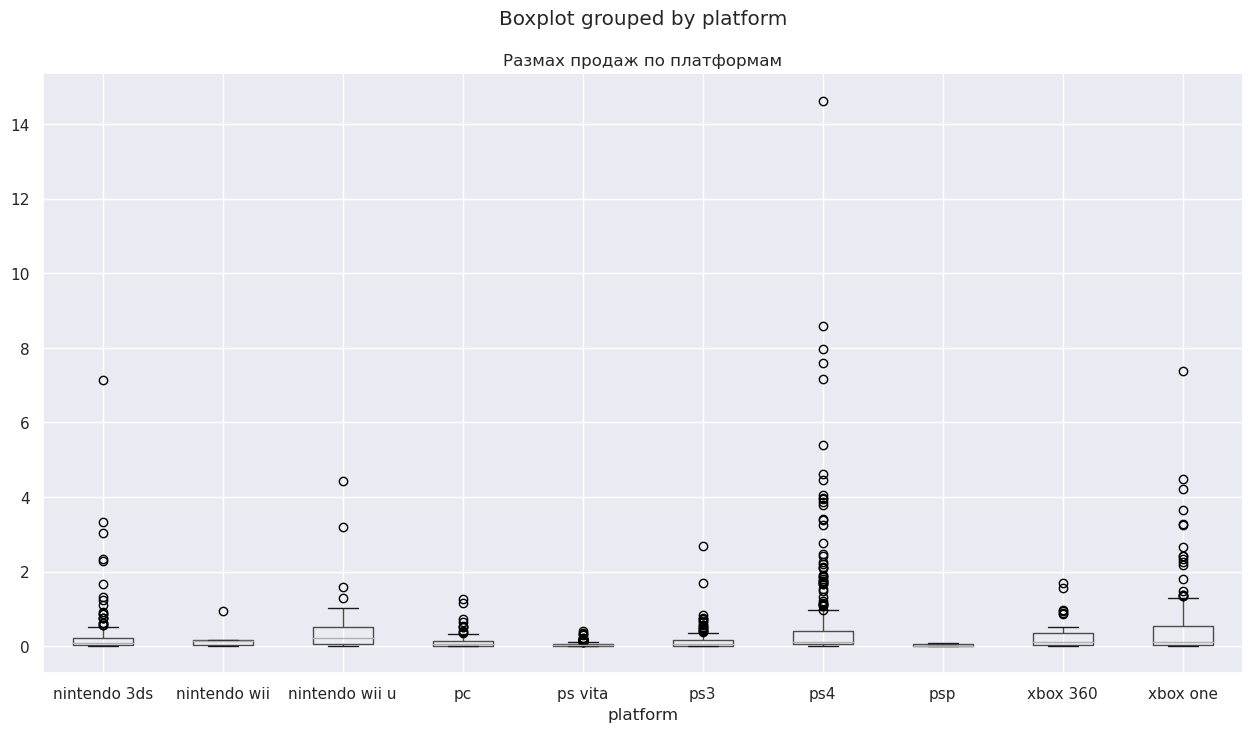

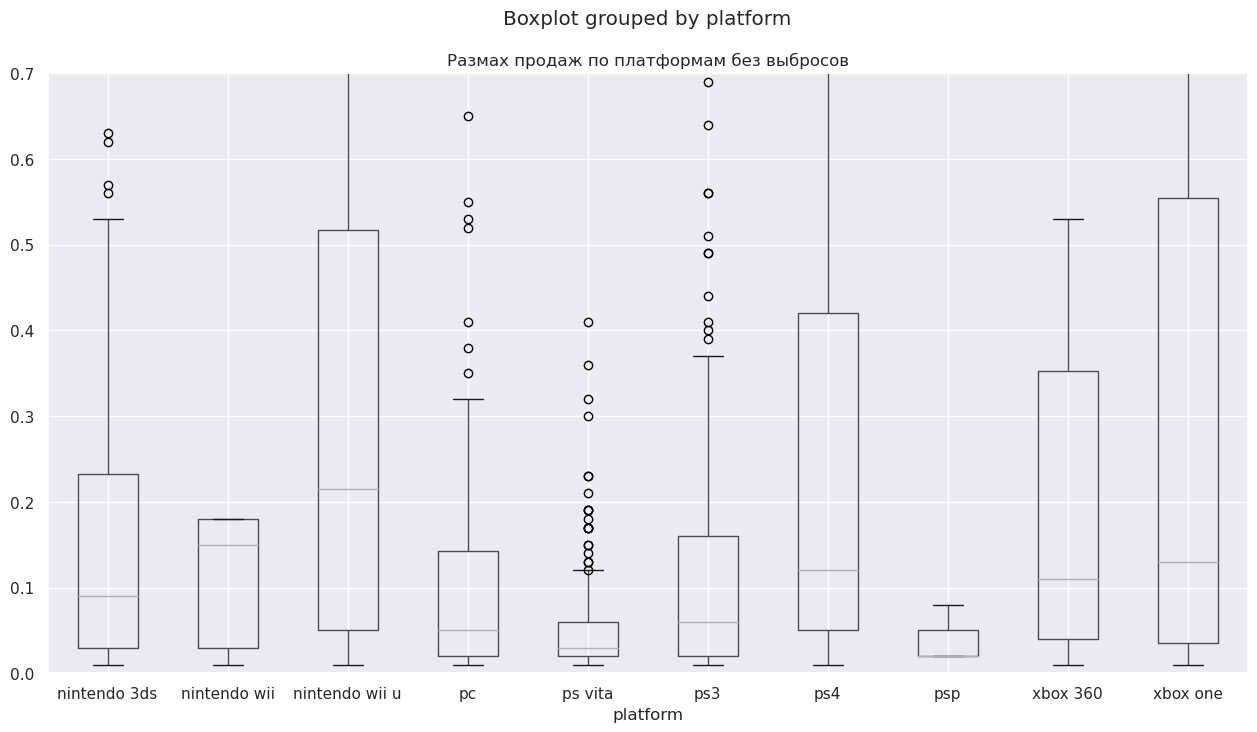

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
ps4,301.00,0.63,1.46,0.01,0.05,0.12,0.42,14.63
ps vita,195.00,0.05,0.06,0.01,0.02,0.03,0.06,0.41
xbox one,167.00,0.52,0.97,0.01,0.04,0.13,0.56,7.39
nintendo 3ds,132.00,0.33,0.80,0.01,0.03,0.09,0.23,7.14
ps3,111.00,0.18,0.34,0.01,0.02,0.06,0.16,2.70
pc,104.00,0.13,0.21,0.01,0.02,0.05,0.14,1.28
xbox 360,48.00,0.28,0.38,0.01,0.04,0.11,0.35,1.70
nintendo wii u,42.00,0.50,0.85,0.01,0.05,0.21,0.52,4.44
nintendo wii,5.00,0.26,0.39,0.01,0.03,0.15,0.18,0.95


In [30]:
# График "ящик с усами"
data_new.boxplot(column='total_sales', by='platform', figsize = (15, 8))
plt.title('Размах продаж по платформам')
plt.show()

# Выведем график преимущественно без выбросов
data_new.boxplot(column='total_sales', by='platform', figsize = (15, 8))
plt.ylim(0, 0.7)
plt.title('Размах продаж по платформам без выбросов')
plt.show()

# Описание столбцов 
data_new.groupby('platform')['total_sales'].describe().sort_values(by='count', ascending=False)

На графике размаха есть выбросы, как раз преимущественно у тройки самых популярных платформ. Это скорее "выстрелевшие" проекты с большим объемом продаж. Не удаляем.

На графике видно, что лидирует `xbox one`. Но по общему итогу на первом месте `ps4`. Значит, в среднем `xbox one` успешнее реализует игры, тогда как `ps4` часто выпускает громкие проекты, которые хорошо "выстреливают" и потому повышают свои продажи. 

`nintendo 3ds` предсталяет собой огромный пласт отдельных пользователей, которые выбират портивный метод геймплея и это как раз нам и визуализирует график.

#### **Вывод**
По итогам исследования обнаружено:
- За весь период данных есть лидер по продажам и это `ps2`, второе место занимаетс `xbox 360`. Но делать анализ и полагаться на эти данные мы не можем, так как многие платформы были выпущены позже и не успели выбиться в лидеры, в частности это касается ps и xbox более новых поколений.
- Среднее кол-во лет существования платформы ~7 лет.Дольше всего сущетсвует на рынке платформа  `pc` - и скорее всего и будет продолжать псуществовать еще много лет. Это фаворит по долголетию. Также конкуренция выстраивается между максимум 10-11 платформами в год. 
- Для исслеования используем данные за период с 2015 по 2016 года. Чтобы учесть самые последние тенденции игровой индустрии.
- Явные лидер по продажам за период `ps4`, а второе место занимает `xbox one`. Потенциал более ранних версий платформ угасает, тогда когда обновленные версии выходят в топ.  


>Меж тем, представители плафтормы `ps` на рынке существуют минимум 12-11 лет судя по платформе 2 и 3 поколения. Так как платформа `ps4` была выпущена только в 2013 году, то у нее в запасе есть ~6 лет активного существования на рынке, тоже касается и прямого конкурента сони `xbox one`.

- Выделим топ-5 популярных платформ:
    - `ps4`
    - `xbox one`
    - `nintendo 3ds`
    - `nintendo wii u`
    - `ps3`

### Как жанры игр влияют на продажи?

Исследуем в этом пункте вопрос насколько жанр игры может влияет на продажи. Найдем ответ на вопрос какие жанры самые популярные и прибыльные на период с 2015 по 2016 года.

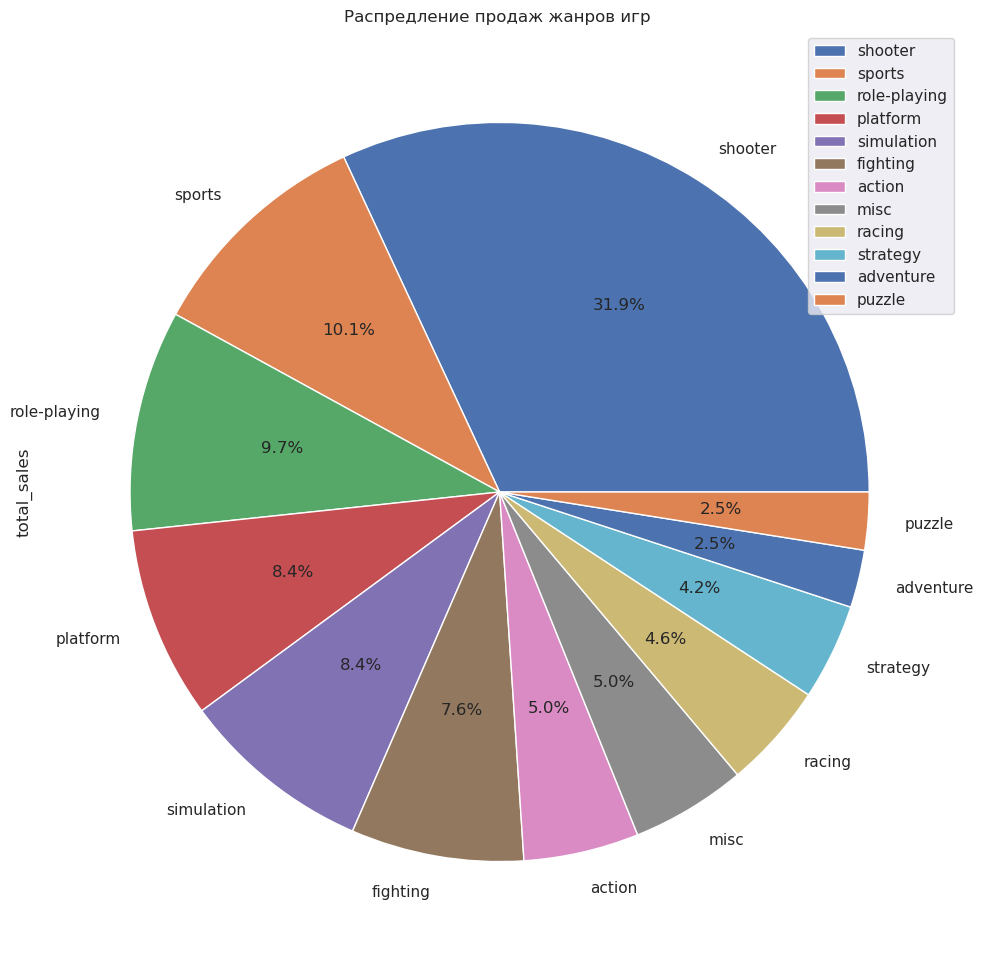

In [31]:
# Построим круговую диаграмму по распредлению жанров
# в зависимости от проданных копий
genre = (data_new
         .pivot_table(index='genre', values='total_sales', aggfunc= 'median')
         .sort_values(by='total_sales', ascending=False)
         .reset_index())
genre['%'] = (genre['total_sales'] / genre['total_sales'].sum()) * 100
genre.plot(kind = 'pie', y ='total_sales', autopct='%1.1f%%', figsize= (12,12),
                         title = 'Распредление продаж жанров игр ', labels = genre['genre']);

#### **Вывод**

Наиболее популярен жанр `shooter` - 31.9%. Это не удивительно. Как правильно игры этого жанра наиболее зрелищны и динамичны.

Со 2го по 5е место раполоились жанры: `sports` - спорт, `role-playing` - мморпг,  `platform` - 2д игры, помогающие расслабиться без напряенного геймплея и `simulation` - игры, которые иначе называют "песочницами", где игрок может выстраивать мир какой захочет по внутренним правилам игры. 

Все вышеперечисленные жанры отличаются в большей мере приятным визуалом игры и продуманным гемйплеем, что и ценят большое количество игроков судя по данным и графику.

Это топ-5 самых популярных жанров:
- `shooter`
- `sports`
- `role-playing`
- `platform`
- `simulation` 

Топ-5 непопулярных жанров:
- `puzzle`
- `adventure`
- `strategy`
- `racing`
- `misc`

### Есть ли влияние отзывов и оценок на продажи игр?

В данном пункте дадим ответ на вопрос есть ли влияние отзывов и оценок на продажи игр. Для исследования возьмем платформs `ps4`, `xbox one` и `pc` за период 2015-2016 года.

Это разное комьюнити, потому результаты должны быть объективными.

/home/evgeniya/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


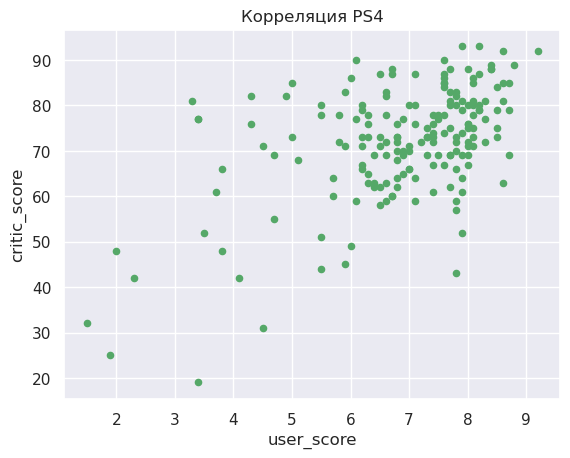

,critic_score,user_score,total_sales
critic_score,1.00,0.53,0.39
user_score,0.53,1.00,-0.06
total_sales,0.39,-0.06,1.00


/home/evgeniya/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


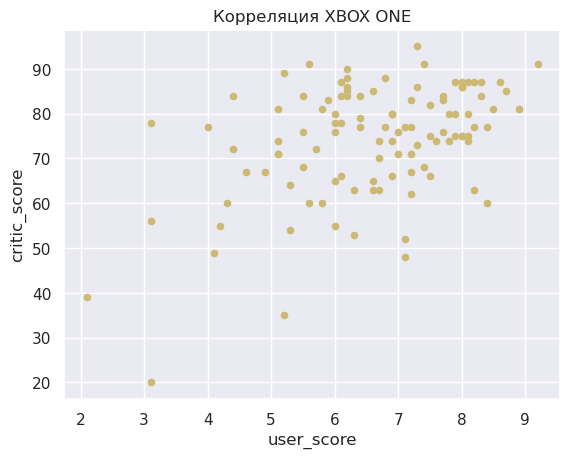

,critic_score,user_score,total_sales
critic_score,1.00,0.46,0.43
user_score,0.46,1.00,-0.04
total_sales,0.43,-0.04,1.00


/home/evgeniya/anaconda3/envs/ds_practicum_env/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


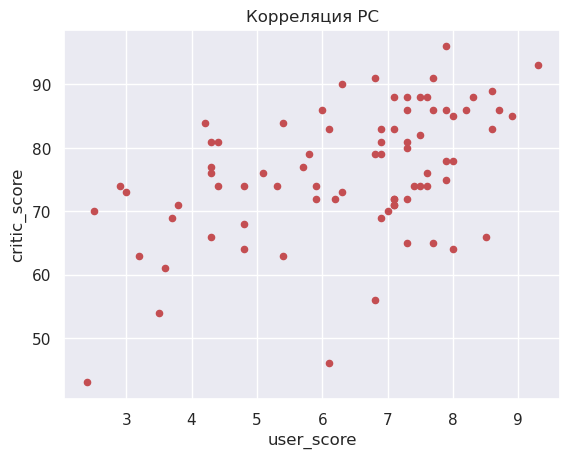

,critic_score,user_score,total_sales
critic_score,1.00,0.48,0.38
user_score,0.48,1.00,0.15
total_sales,0.38,0.15,1.00


In [32]:
#PS4
#Строим график разброса
score = data_new.query('platform == "ps4"')
score.plot(x='user_score', y='critic_score', title='Корреляция PS4', color='g', kind='scatter');
plt.show()

# Построим таблицу с корреляцией между отзывами и продажами
score_corr = score[['critic_score','user_score', 'total_sales']]
display(score_corr.corr())

#XBOX ONE
#Строим график разброса
score = data_new.query('platform == "xbox one"')
score.plot(x='user_score', y='critic_score', title='Корреляция XBOX ONE', color='y', kind='scatter');
plt.show()

# Построим таблицу с корреляцией между отзывами и продажами
score_corr = score[['critic_score','user_score', 'total_sales']]
display(score_corr.corr())

#PC
#Строим график разброса
score = data_new.query('platform == "pc"')
score.plot(x='user_score', y='critic_score', title='Корреляция PC', color='r', kind='scatter');
plt.show()

# Построим таблицу с корреляцией между отзывами и продажами
score_corr = score[['critic_score','user_score', 'total_sales']]
display(score_corr.corr())


#### **Вывод**
Есть явное влияние оценок критиков и общих продаж по платформам. Оценки же обычных пользователей никак не влияют на продажи.

## Какой портрет пользователя в каждом отдельном регионе?

Цель пункта определить для каждого региона набор данных:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5)

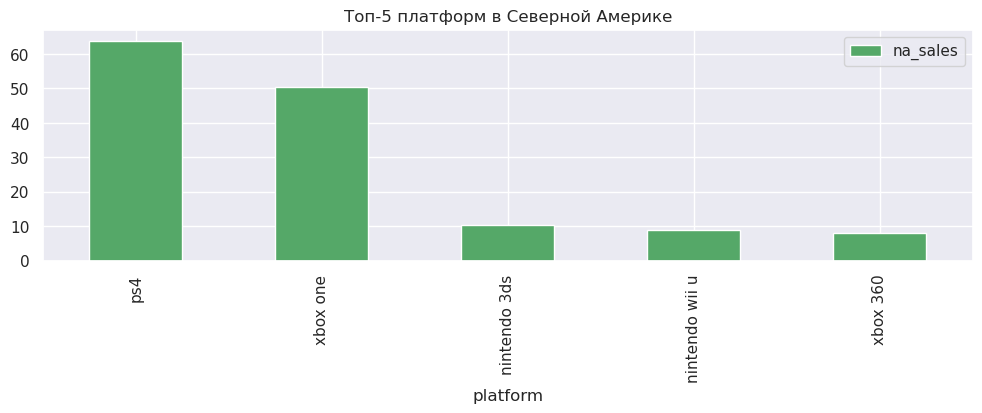

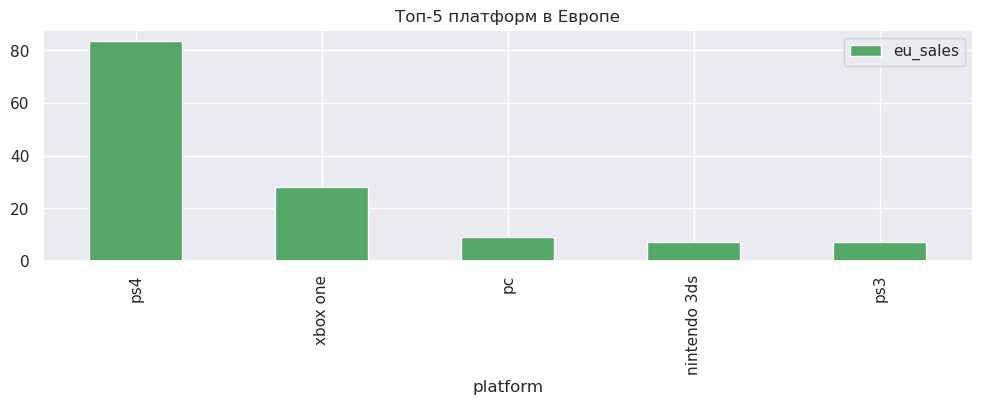

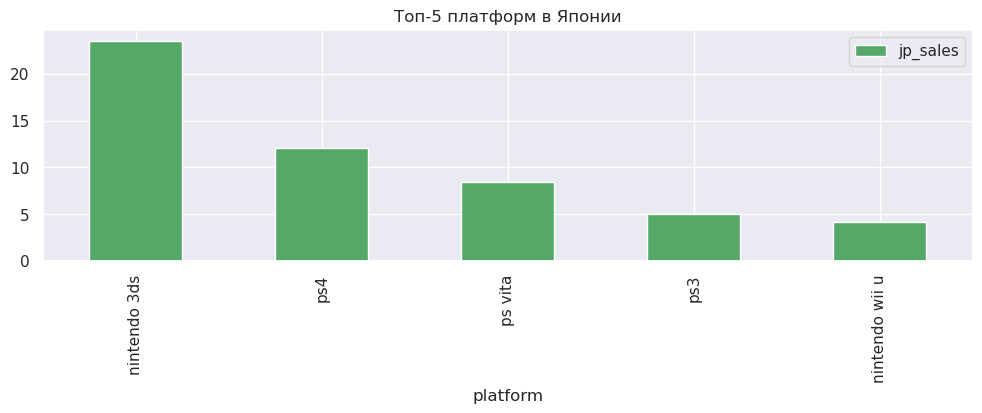

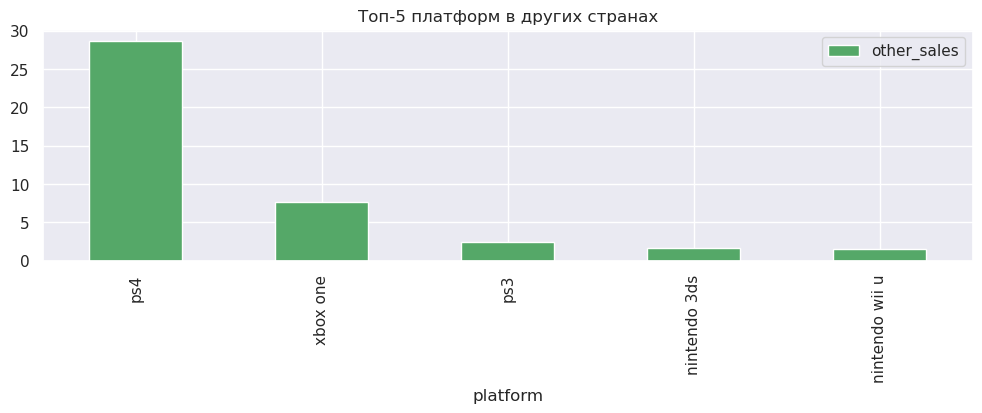

In [33]:
#Строим график самых популярных платформ в Северной Америке
(data_new
 .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending=False)
 .head(5)
 .plot(kind = 'bar', title='Топ-5 платформ в Северной Америке', color='g', figsize=(12,3)))
plt.show()

#Строим график самых популярных платформ в Европе
(data_new
 .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending=False)
 .head(5)
 .plot(kind = 'bar', title='Топ-5 платформ в Европе', color='g', figsize=(12,3)))
plt.show()

#Строим график самых популярных платформ в Японии
(data_new
 .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending=False)
 .head(5)
 .plot(kind = 'bar', title='Топ-5 платформ в Японии', color='g', figsize=(12,3)))
plt.show()

#Строим график самых популярных платформ в других странах
(data_new
 .pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum')
 .sort_values(by = 'other_sales', ascending=False)
 .head(5)
 .plot(kind = 'bar', title='Топ-5 платформ в других странах', color='g', figsize=(12,3)))
plt.show()


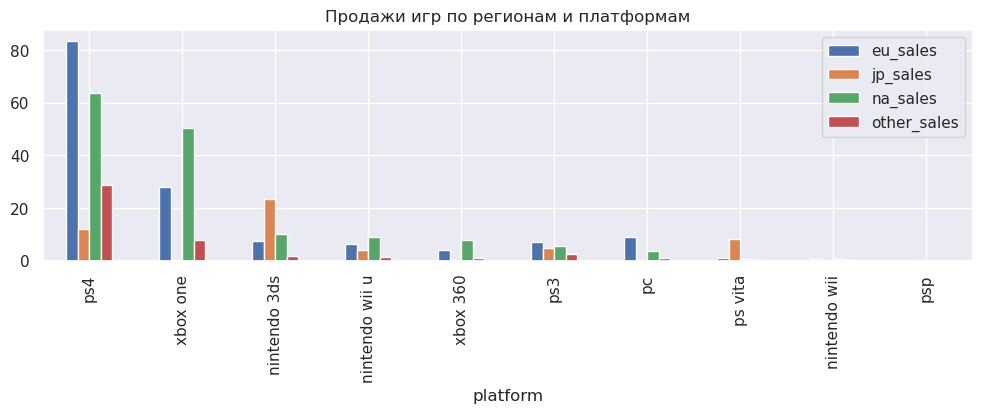

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
nintendo 3ds,7.39,23.55,10.31,1.67
nintendo wii,0.73,0.00,0.49,0.10
nintendo wii u,6.49,4.12,8.86,1.48
pc,9.10,0.00,3.72,0.95
ps vita,1.08,8.41,0.54,0.47
ps3,7.30,4.97,5.66,2.49
ps4,83.54,12.05,63.86,28.70
psp,0.00,0.12,0.00,0.00
xbox 360,4.21,0.00,8.05,1.22


In [34]:
# Построим общий график по общему количеству по всем регионам по платформам
regions = (data_new
 .pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales')
              , aggfunc='sum')
 .sort_values(by='na_sales', ascending=False))
    

regions.plot(kind = 'bar', title='Продажи игр по регионам и платформам', figsize=(12,3))
plt.show()

# Сосздаем таблицу со значениями общих продаж по регионам
regions = (data_new
 .pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales')
              , aggfunc='sum', margins=True))
regions 

По распределению продаж по регионам можно обратить внимание, что объем продаж в Японии на 3м месте. В японии популярна портативная платформа `nintendo 3ds`, которую нужно учитывать при прогнозе. Это не малая часть рынка. 

Несменными же лидерами остаются `ps4` и `xbox one`.


### Самые популярные жанры (топ-5)

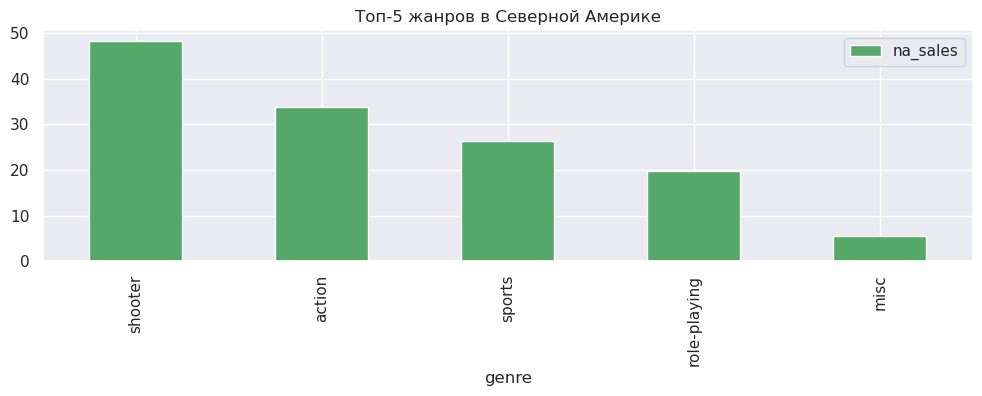

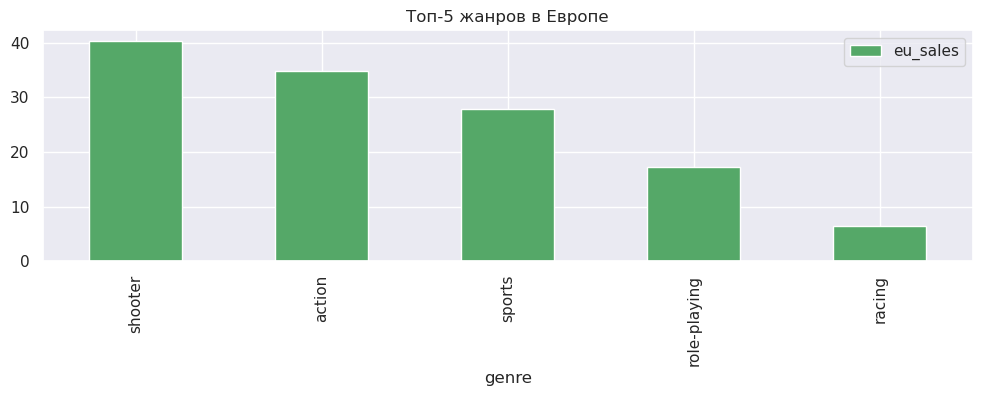

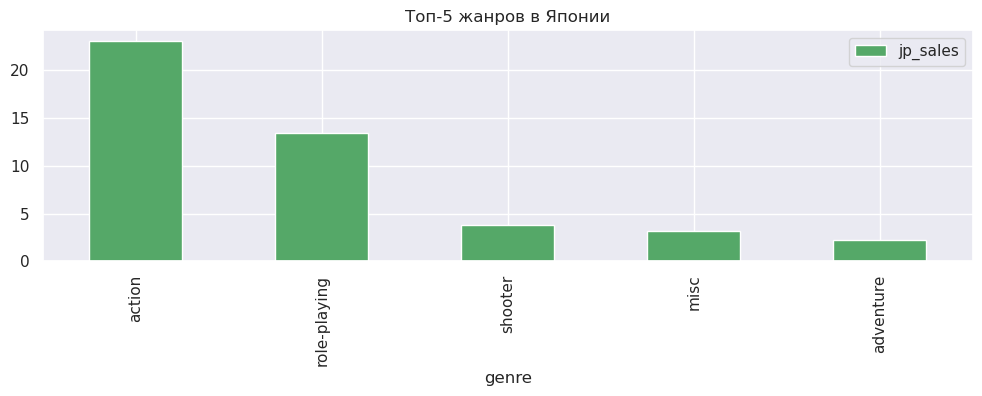

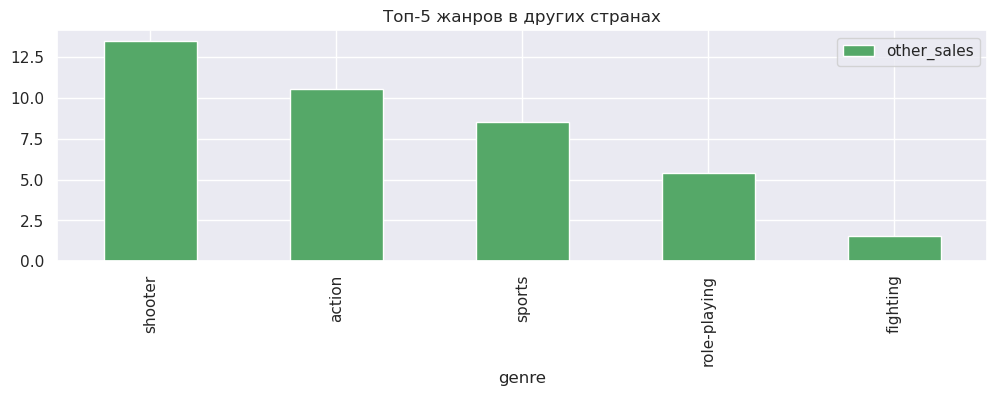

In [35]:
#Строим график самых популярных жанров в Северной Америке
(data_new
 .pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
 .sort_values(by = 'na_sales', ascending=False)
 .head(5)
 .plot(kind = 'bar', title='Топ-5 жанров в Северной Америке', color='g', figsize=(12,3)))
plt.show()

#Строим график самых популярных жанров в Европе
(data_new
 .pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
 .sort_values(by = 'eu_sales', ascending=False)
 .head(5)
 .plot(kind = 'bar', title='Топ-5 жанров в Европе', color='g', figsize=(12,3)))
plt.show()

#Строим график самых популярных жанров в Японии
(data_new
 .pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
 .sort_values(by = 'jp_sales', ascending=False)
 .head(5)
 .plot(kind = 'bar', title='Топ-5 жанров в Японии', color='g', figsize=(12,3)))
plt.show()

#Строим график самых популярных жанров в других странах
(data_new
 .pivot_table(index = 'genre', values = 'other_sales', aggfunc = 'sum')
 .sort_values(by = 'other_sales', ascending=False)
 .head(5)
 .plot(kind = 'bar', title='Топ-5 жанров в других странах', color='g', figsize=(12,3)))
plt.show()


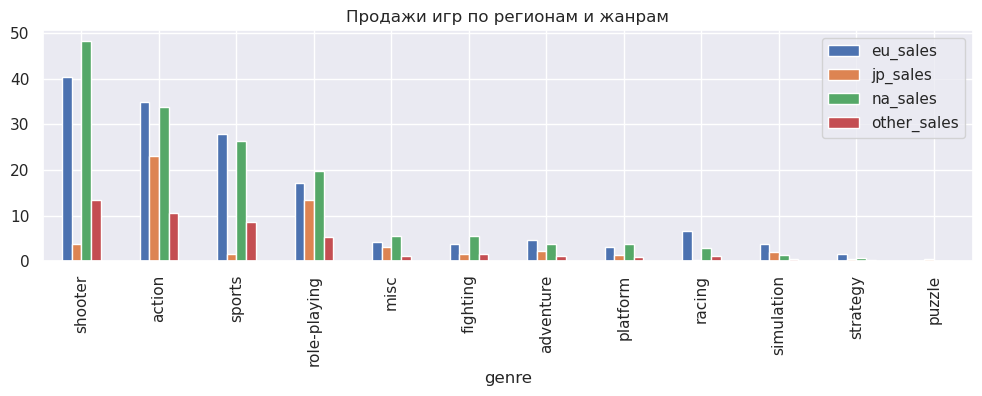

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
action,34.82,23.05,33.68,10.58
adventure,4.67,2.22,3.84,1.25
fighting,3.72,1.54,5.54,1.57
misc,4.26,3.19,5.58,1.14
platform,3.20,1.42,3.78,0.88
puzzle,0.13,0.52,0.06,0.01
racing,6.52,0.29,2.82,1.23
role-playing,17.21,13.41,19.82,5.38
shooter,40.28,3.79,48.18,13.48


In [36]:
# Построим общий график по общему количеству по всем регионам по жанрам
genres = (data_new
 .pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales')
              , aggfunc='sum')
 .sort_values(by='na_sales', ascending=False))
    

genres.plot(kind = 'bar', title='Продажи игр по регионам и жанрам', figsize=(12,3))
plt.show()

# Создаем таблицу со значениями общих продаж по регионам
genres_total = (data_new
 .pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales', 'other_sales')
              , aggfunc='sum', margins=True))
genres_total

Игроки Серверной Америки и Европы преимушественно играют в жанры `action`, `shooter` и `sports`, это логично, так как основными платформами у них являются стационарные консоли `ps4` и `xbox one`, что позволяет насладиться играми этих жанров вдоволь. Эти игры преимущественно и разрабатываются для стационарных платформ.

Игроки Японии преимущественно играют на портативных устройствах, потому на первом месте у них игры жанра `action` и на втором `role-playing`.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

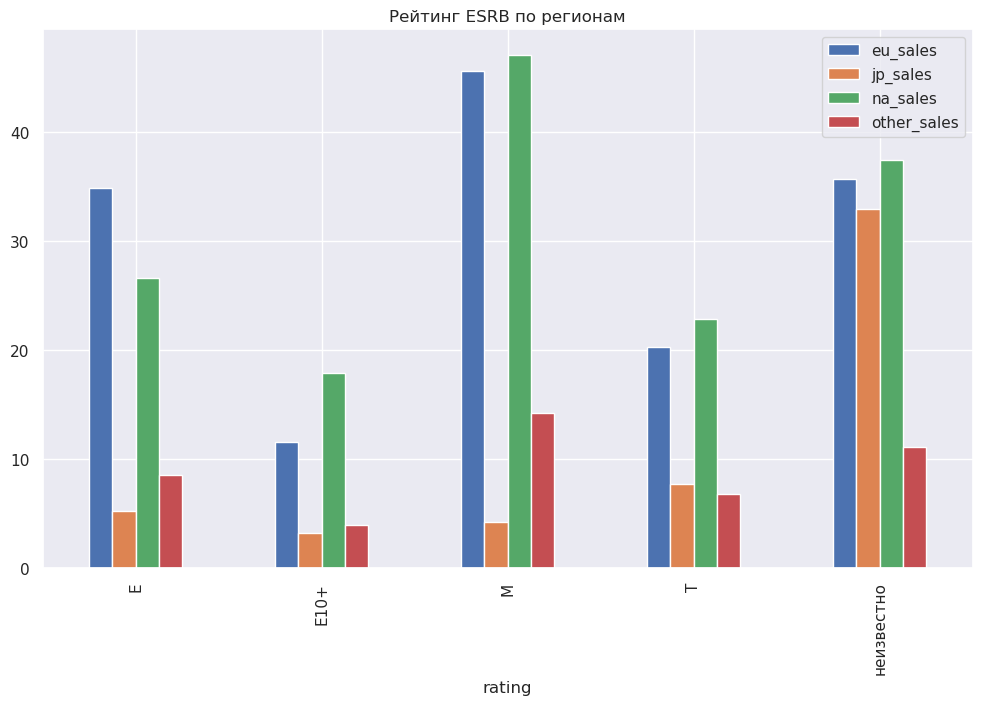

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,34.83,5.25,26.59,8.57
E10+,11.54,3.27,17.87,4.00
M,45.54,4.29,47.03,14.24
T,20.32,7.70,22.86,6.85
неизвестно,35.71,32.89,37.44,11.13


In [37]:
# Строим таблицу и график с рейтингами по всем регионам
esrb = data_new.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum')
esrb.plot(kind = 'bar', title='Рейтинг ESRB по регионам', figsize=(12,7))
plt.show()
display(esrb)

Описание классификаций рейтинга:

- `E` -   Для всех
- `E10+`  -  Для всех от 10 лет и старше
- `T`  -  Подросткам» от 13ти
- `M`  -  Для взрослых» от 17ти

По данным и графику видно, что наибольшее количество игр с рейтингом 17+ в Северной Америке, Европе и других странах, в Японии и игр больше с 13+. Очень большое количество рейтинга возрастного ограничения не известно по данным.

Можно предположить, что в Японии жетский регламент присвоения рейтинга или рецензирования игр, потому либо игры не доходят до релиза, либо с потерей части контента переносятся в более пладшую категорию.

### **Вывод**

По исследованию явным фаворитами в жанре игр можно выделить 3 основных: `action`, `shooter`, `sports`

По используемым платформам выделяются: `ps4`, `xbox one`, `nintendo 3ds`


Портреты пользователей:
Буду указывать самые популярные варианты из топ-5.

**Портрет пользователя игрока Северной Америки**
Игрок играющий преимущественно на стационарных и портативных платформах по типу: `ps4`, `xbox one`, `nintendo 3ds`
Выбирает жанры игр с динамичным и визуально приятным геймплеем: `action`, `shooter`, `sports`
Возрастное ограничение игр преимущественно `"М" 17+`

**Портрет пользователя игрока Европы**
Игрок играющий преимущественно на стационарной площадке по типу: `ps4`, `xbox one`, `pc`
Выбирает жанры игр с динамичным и визуально приятным геймплеем: `action`, `shooter`, `sports`
Возрастное ограничение игр преимущественно `"М" 17+`

**Портрет пользователя игрока Японии**
Игрок играющий преимущественно на портативных платформах и пк: `nintendo 3ds`, `pc`, `ps vita`
Выбирает жанры игр с динамичным и визуально приятным геймплеем: `action`,`role-playing`, `shooter`
Возрастное ограничение игр преимущественно `"T" 13+`

**Портрет пользователя игрока других стран**
Игрок играющий преимущественно на стационарных и портативных платформах по типу: `ps4`, `xbox one`, `ps3`
Выбирает жанры игр с динамичным и визуально приятным геймплеем: `shooter`, `action`, `sports`
Возрастное ограничение игр преимущественно `"М" 17+`

## Проверка гипотез

**1.Гипотеза. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Сформируем альтернативные гипотезы для задачи:

H0: Cредний рейтинг пользователей `xbox one` и `pc` одинаковый

H1: Cредний рейтинг пользователей `xbox one` и `pc` разный

In [38]:
one = data_new[(data_new['platform'] == 'xbox one') &  (data_new['user_score'] > 0)]['user_score']
pc = data_new[(data_new['platform'] == 'pc') &  (data_new['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы xbox one:', one.mean())
print('Средний пользовательский рейтинг платформы pc', pc.mean())

Средний пользовательский рейтинг платформы xbox one: 6.542148760330578
Средний пользовательский рейтинг платформы pc 6.29642857142857


In [39]:
# Проверяем гипотезу
alpha = 0.05
results = st.ttest_ind(one, pc, equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтвердилась. Cредний рейтинг пользователей `xbox one` и `pc` одинаковый.

**2. Гипотеза. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформируем альтернативные гипотезы для задачи:

H0: Средний пользовательйский рейтинг жанров Action и Sports одинаковый.

H1: Средний пользовательйский рейтинг жанров Action и Sports разный.

In [40]:
action = data_new[(data_new['genre'] == 'action') &  (data_new['user_score'] > 0)]['user_score']
sports = data_new[(data_new['genre'] == 'sports') &  (data_new['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра action:', action.mean())
print('Средний пользовательский рейтинг жанра sports', sports.mean())

Средний пользовательский рейтинг жанра action: 6.808290155440415
Средний пользовательский рейтинг жанра sports 5.198780487804878


In [41]:
# Проверяем гипотезу
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась. Средний пользовательйский рейтинг жанров `action` и `sports` разный.

#### **Вывод**

По итогам проверки гипотез выяснились интересные факты, что вроде как игроки персональных компьютером и стационарных платформ могли бы различаться в пользовательских рейтингах, но результат показал обратное. 

Такая же интересная ситуация и с жанрами. Жанры `action` и `sports` могли бы иметь равный рейтинг, но из-за специфики геймплея он также может отличаться, что результат проверки гипотезы нам и показал.

## Общий вывод



В ходе исследования данных о продаже видеоигр за актуальный период с 2015 по 2016 год были получены результаты по ряду параметров:

**Платформы:**

- Явные лидер по продажам за период `ps4`, а второе место занимает `xbox one`. Потенциал более ранних версий платформ угасает, тогда когда обновленные версии выходят в топ.  

- В среднем `xbox one` успешнее реализует игры, тогда как `ps4` часто выпускает громкие проекты, которые хорошо "выстреливают" и потому повышают свои продажи, привлекая внимание к платформе.

- `nintendo 3ds` предсталяет собой огромный пласт отдельных пользователей, которые выбират портивный метод геймплея и это как раз нам и визуализирует график.

>Меж тем, представители плафтормы `ps` на рынке существуют минимум 12-11 лет судя по платформе 2 и 3 поколения. Так как платформа `ps4` была выпущена только в 2013 году, то у нее в запасе есть ~6 лет активного существования на рынке, тоже касается и прямого конкурента сони `xbox one`.

- Выделим топ-5 популярных платформ:
    - `ps4`
    - `xbox one`
    - `nintendo 3ds`
    - `nintendo wii u`
    - `ps3`
    
**Жанры:**

Наиболее популярен жанр `shooter` - 31.9%. Это не удивительно. Как правильно игры этого жанра наиболее зрелищны и динамичны.

Со 2го по 5е место раполоились жанры: `sports` - спорт, `role-playing` - мморпг,  `platform` - 2д игры, помогающие расслабиться без напряенного геймплея и `simulation` - игры, которые иначе называют "песочницами", где игрок может выстраивать мир какой захочет по внутренним правилам игры. 

Все вышеперечисленные жанры отличаются в большей мере приятным визуалом игры и продуманным гемйплеем, что и ценят большое количество игроков судя по данным и графику.

Это топ-5 самых популярных жанров:
- `shooter`
- `sports`
- `role-playing`
- `platform`
- `simulation` 

Топ-5 непопулярных жанров:
- `puzzle`
- `adventure`
- `strategy`
- `racing`
- `misc`

**Оценки критиков и пользователей:**

Есть явное влияние оценок критиков и общих продаж по платформам. Оценки же обычных пользователей никак не влияют на продажи.

**Возрастной рейтинг:**

По данным и графику видно, что наибольшее количество игр с рейтингом 17+ в Северной Америке, Европе и других странах, в Японии и игр больше с 13+. Очень большое количество рейтинга возрастного ограничения не известно по данным.

Можно предположить, что в Японии жетский регламент присвоения рейтинга или рецензирования игр, потому либо игры не доходят до релиза, либо с потерей части контента переносятся в более пладшую категорию.

**Портреты пользователей:**

**Портрет пользователя игрока Северной Америки**
Игрок играющий преимущественно на стационарных и портативных платформах по типу: `ps4`, `xbox one`, `nintendo 3ds`
Выбирает жанры игр с динамичным и визуально приятным геймплеем: `action`, `shooter`, `sports`
Возрастное ограничение игр преимущественно `"М" 17+`

**Портрет пользователя игрока Европы**
Игрок играющий преимущественно на стационарной площадке по типу: `ps4`, `xbox one`, `pc`
Выбирает жанры игр с динамичным и визуально приятным геймплеем: `action`, `shooter`, `sports`
Возрастное ограничение игр преимущественно `"М" 17+`

**Портрет пользователя игрока Японии**
Игрок играющий преимущественно на портативных платформах и пк: `nintendo 3ds`, `pc`, `ps vita`
Выбирает жанры игр с динамичным и визуально приятным геймплеем: `action`,`role-playing`, `shooter`
Возрастное ограничение игр преимущественно `"T" 13+`

**Портрет пользователя игрока других стран**
Игрок играющий преимущественно на стационарных и портативных платформах по типу: `ps4`, `xbox one`, `ps3`
Выбирает жанры игр с динамичным и визуально приятным геймплеем: `shooter`, `action`, `sports`
Возрастное ограничение игр преимущественно `"М" 17+`


**Ответ на поставленую задачу для исследования**

По исследованию явным фаворитами в жанре игр можно выделить 3 основных: `action`, `shooter`, `sports`

По используемым платформам выделяются: `ps4`, `xbox one`, `nintendo 3ds`.

Наиболее успешным вариантом будет разработка нового продукта на платформу `ps4` с поддержкой `ps3` и `xbox one` с поддержкой на `xbox 360`.

Для охвата всего рынка игра должна быть возрастной категории не выше Т 13+, для категории М17+ охват будет меньше, - не все пользователя Японии будут заинтересованы в игре.


